# Ejercicio 1

A) Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 −1.
(a) Sean𝑋 ∼ U(0,1) y𝑌 := 𝑓 (𝑋). Fijemos𝑛 = 100. Tomar muestras𝑥1,...,𝑥𝑛 de𝑋 y aplicar la
función 𝑓 a cada muestra para calcular𝑦𝑖 = 𝑓 (𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de
la forma 𝑌 = 𝑋𝛽1 + 𝛽0 +𝜖 a partir de los samples (𝑥1,𝑦1),..., (𝑥𝑛,𝑦𝑛) generados y calcular,
para cada 𝑖 ∈ {1,...,𝑛}, 𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).
 Describir la distribución empírica dada por {𝜀1, . . .,𝜀𝑛}.

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1. Generar 100 samples con distribucion unfirome entre 0 y 1
samples_x = np.random.uniform(0, 1, 100)

In [3]:
# 2.1 Defino la  𝑓 (𝑥) = 2𝑥 −1.
def f(x):
    return 2*x - 1

In [4]:
# 2.2 Evaluar la funcion f(x) en los samples generados
samples_y = f(samples_x)

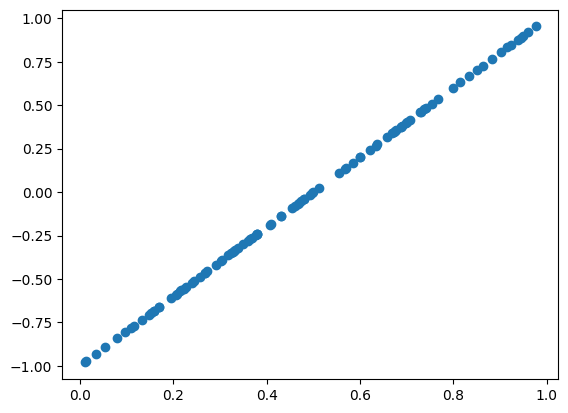

In [7]:
# 3. Graficar los samples generados y la funcion f(x)
plt.scatter(samples_x, samples_y, label='Samples')

Coeficiente beta_1 estimado: [2.]
Intercepto beta_0 estimado: -0.9999999999999999


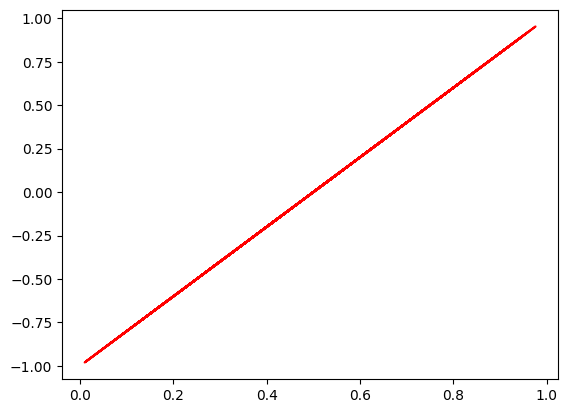

In [14]:
# 3.1  Ajuste lineal: Se ajusta un modelo de regresión lineal con las muestras ( 𝑥 𝑖 , 𝑦 𝑖 ) (x i ​ ,y i ​ ) para estimar los coeficientes 𝛽 1 β 1 ​ y 𝛽 0 β 0 ​ .
# Hay diversas formas:

# Scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model_fit = model.fit(samples_x.reshape(-1, 1), samples_y)

Y_pred = model.predict(samples_x.reshape(-1, 1))
plt.plot(samples_x, Y_pred, color='red', label='Linear Regression (Scikit-learn)')
errors = samples_y - Y_pred

print(f"Coeficiente beta_1 estimado: {model_fit.coef_}")
print(f"Intercepto beta_0 estimado: {model_fit.intercept_}")



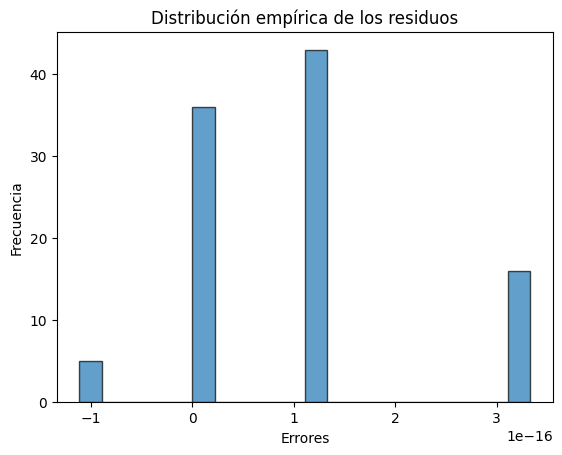

In [15]:
# 4 Mostrar la distribución empírica de los errores
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)
plt.title("Distribución empírica de los residuos")
plt.xlabel("Errores")
plt.ylabel("Frecuencia")
plt.show()

B) 
'''Sean 𝑋 ∼ U(0,1),𝑍 ∼ N(0,0.25) y𝑌 := 𝑓 (𝑋)+𝑍. Fijemos 𝑛 = 100. Tomar muestras 𝑥1,...,𝑥𝑛
 de 𝑋 y 𝑧1,...,𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) +𝑧𝑖, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de
 la forma 𝑌 = 𝑋𝛽1 + 𝛽0 +𝜖 a partir de los samples (𝑥1,𝑦1),..., (𝑥𝑛,𝑦𝑛) generados y calcular,
 para cada 𝑖 ∈ {1,...,𝑛}, 𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).
 Describir la distribución empírica dada por {𝜀1, . . .,𝜀𝑛} haciendo un histograma.
 '''

In [17]:
# 1 Genero los samples
samples_x = np.random.uniform(0, 1, 100)
samples_error = np.random.normal(0, 0.25, 100)

In [18]:
# 2 Defino la función f(x) = 2x - 1
# Creada anteriormente


In [19]:
# 3 Evaluar la función f(x) en los samples generados
samples_y = f(samples_x) + samples_error


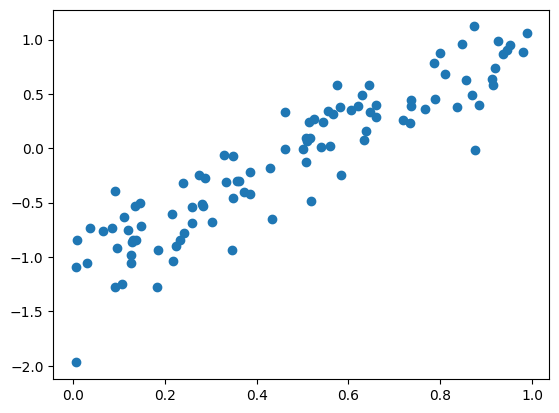

In [20]:
# 4 Graficar los samples generados y la función f(x)
plt.scatter(samples_x, samples_y, label='Samples')


Coeficiente beta_1 estimado: [2.10654196]
Intercepto beta_0 estimado: -1.1032942646051478


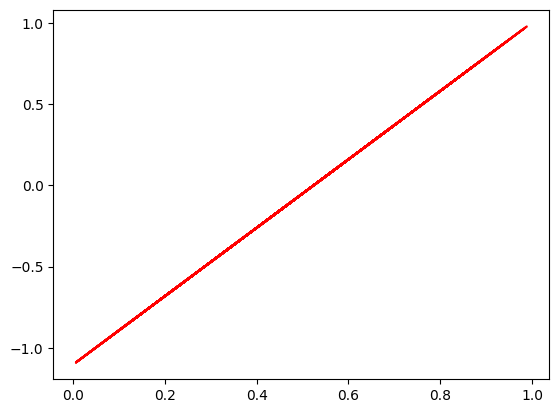

In [23]:
# 5 Realizar ajuste lineal
model = LinearRegression() 
model_fit = model.fit(samples_x.reshape(-1, 1), samples_y)

Y_pred = model.predict(samples_x.reshape(-1, 1))

plt.plot(samples_x, Y_pred, color='red', label='Linear Regression (Scikit-learn)')

b1 = model_fit.coef_
b0 = model_fit.intercept_
print(f"Coeficiente beta_1 estimado: {b1}")
print(f"Intercepto beta_0 estimado: {b0}")


errors = samples_y - (samples_x*b1 + b0) # formula de error particular 


(array([ 1.,  1.,  0.,  0.,  2.,  1.,  2.,  4.,  2.,  8.,  7., 10., 15.,
        11.,  7., 10., 13.,  2.,  1.,  3.]),
 array([-0.88052806, -0.81049784, -0.74046761, -0.67043739, -0.60040716,
        -0.53037694, -0.46034672, -0.39031649, -0.32028627, -0.25025605,
        -0.18022582, -0.1101956 , -0.04016537,  0.02986485,  0.09989507,
         0.1699253 ,  0.23995552,  0.30998575,  0.38001597,  0.45004619,
         0.52007642]),
 <BarContainer object of 20 artists>)

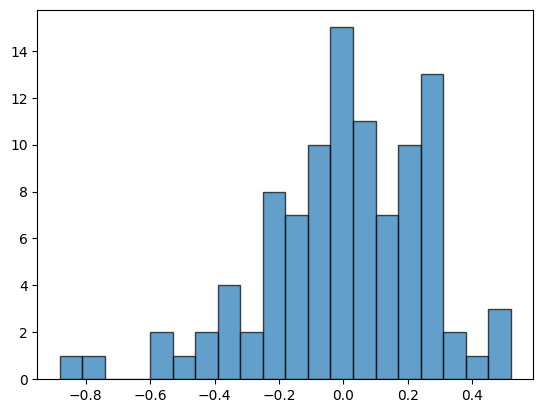

In [24]:
# 6 Mostrar la distribución empírica de los errores
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)

""" Repetir el paso anterior desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar y estimar la
media y la varianza de 𝜀 en función de 𝑛."""

Coeficiente beta_1 estimado: [2.6644745]
Intercepto beta_0 estimado: -1.4110792679297433


(array([1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 2., 1., 0., 0., 1., 1., 0.,
        0., 0., 1.]),
 array([-0.58796284, -0.53124756, -0.47453228, -0.417817  , -0.36110172,
        -0.30438644, -0.24767116, -0.19095589, -0.13424061, -0.07752533,
        -0.02081005,  0.03590523,  0.09262051,  0.14933578,  0.20605106,
         0.26276634,  0.31948162,  0.3761969 ,  0.43291218,  0.48962746,
         0.54634273]),
 <BarContainer object of 20 artists>)

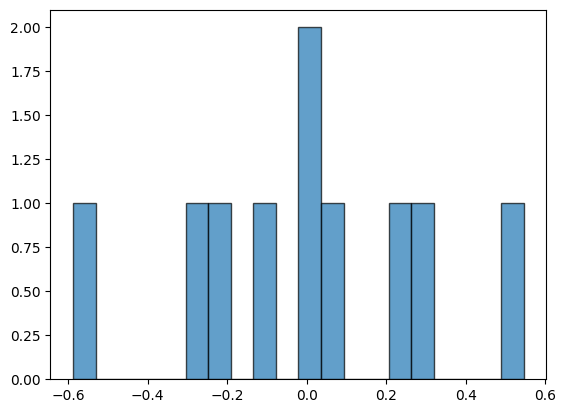

In [25]:
# Repetir desde n = 10
n = 10
samples_x = np.random.uniform(0, 1, n)
samples_error = np.random.normal(0, 0.25, n)
samples_y = f(samples_x) + samples_error

model = LinearRegression()
model_fit = model.fit(samples_x.reshape(-1, 1), samples_y)

Y_pred = model.predict(samples_x.reshape(-1, 1))

#plt.plot(samples_x, Y_pred, color='green', label='Linear Regression (Scikit-learn) n=10')

b1 = model_fit.coef_
b0 = model_fit.intercept_
print(f"Coeficiente beta_1 estimado: {b1}")
print(f"Intercepto beta_0 estimado: {b0}")

errors = samples_y - (samples_x*b1 + b0)

plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)

Coeficiente beta_1 estimado: [1.94115985]
Intercepto beta_0 estimado: -0.9663557973284242


(array([  3.,   3.,  11.,  26.,  36.,  71.,  96., 111., 119., 151., 122.,
        107.,  52.,  45.,  26.,  14.,   4.,   1.,   0.,   2.]),
 array([-0.76425898, -0.67985155, -0.59544411, -0.51103668, -0.42662925,
        -0.34222181, -0.25781438, -0.17340695, -0.08899952, -0.00459208,
         0.07981535,  0.16422278,  0.24863021,  0.33303765,  0.41744508,
         0.50185251,  0.58625994,  0.67066738,  0.75507481,  0.83948224,
         0.92388968]),
 <BarContainer object of 20 artists>)

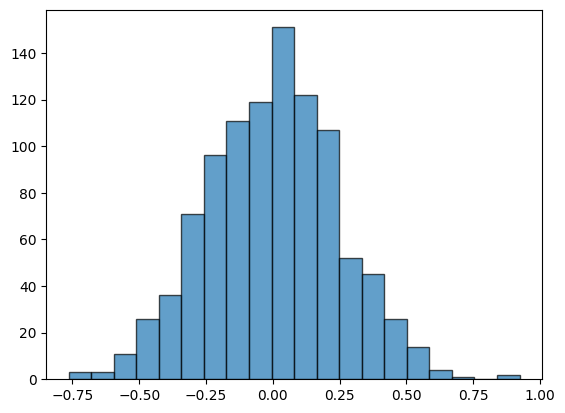

In [26]:
# Repetir desde n = 1000
n = 1000
samples_x = np.random.uniform(0, 1, n)
samples_error = np.random.normal(0, 0.25, n)
samples_y = f(samples_x) + samples_error

model = LinearRegression()
model_fit = model.fit(samples_x.reshape(-1, 1), samples_y)

Y_pred = model.predict(samples_x.reshape(-1, 1))

#plt.plot(samples_x, Y_pred, color='green', label='Linear Regression (Scikit-learn) n=10')

b1 = model_fit.coef_
b0 = model_fit.intercept_
print(f"Coeficiente beta_1 estimado: {b1}")
print(f"Intercepto beta_0 estimado: {b0}")

errors = samples_y - (samples_x*b1 + b0)

plt.hist(errors, bins=20, edgecolor='k', alpha=0.7)